In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'

In [3]:
from data import *
from theta import *
from decoding import *
from plot import *

In [4]:
theta_thres = 20
corr_thres = 0.9

In [ ]:
rolling_preds_barat, phase_preds_barat, target_barat = analysis_flow('barat', theta_thres, corr_thres)
rolling_preds_buchanan, phase_preds_buchanan, target_buchanan = analysis_flow('buchanan', theta_thres, corr_thres)
rolling_preds_stella, phase_preds_stella, target_stella = analysis_flow('stella', theta_thres, corr_thres)
rolling_preds_superchris, phase_preds_superchris, target_superchris = analysis_flow('superchris', theta_thres, corr_thres)
rolling_preds_mitt, phase_preds_mitt, target_mitt = analysis_flow('mitt', theta_thres, corr_thres)

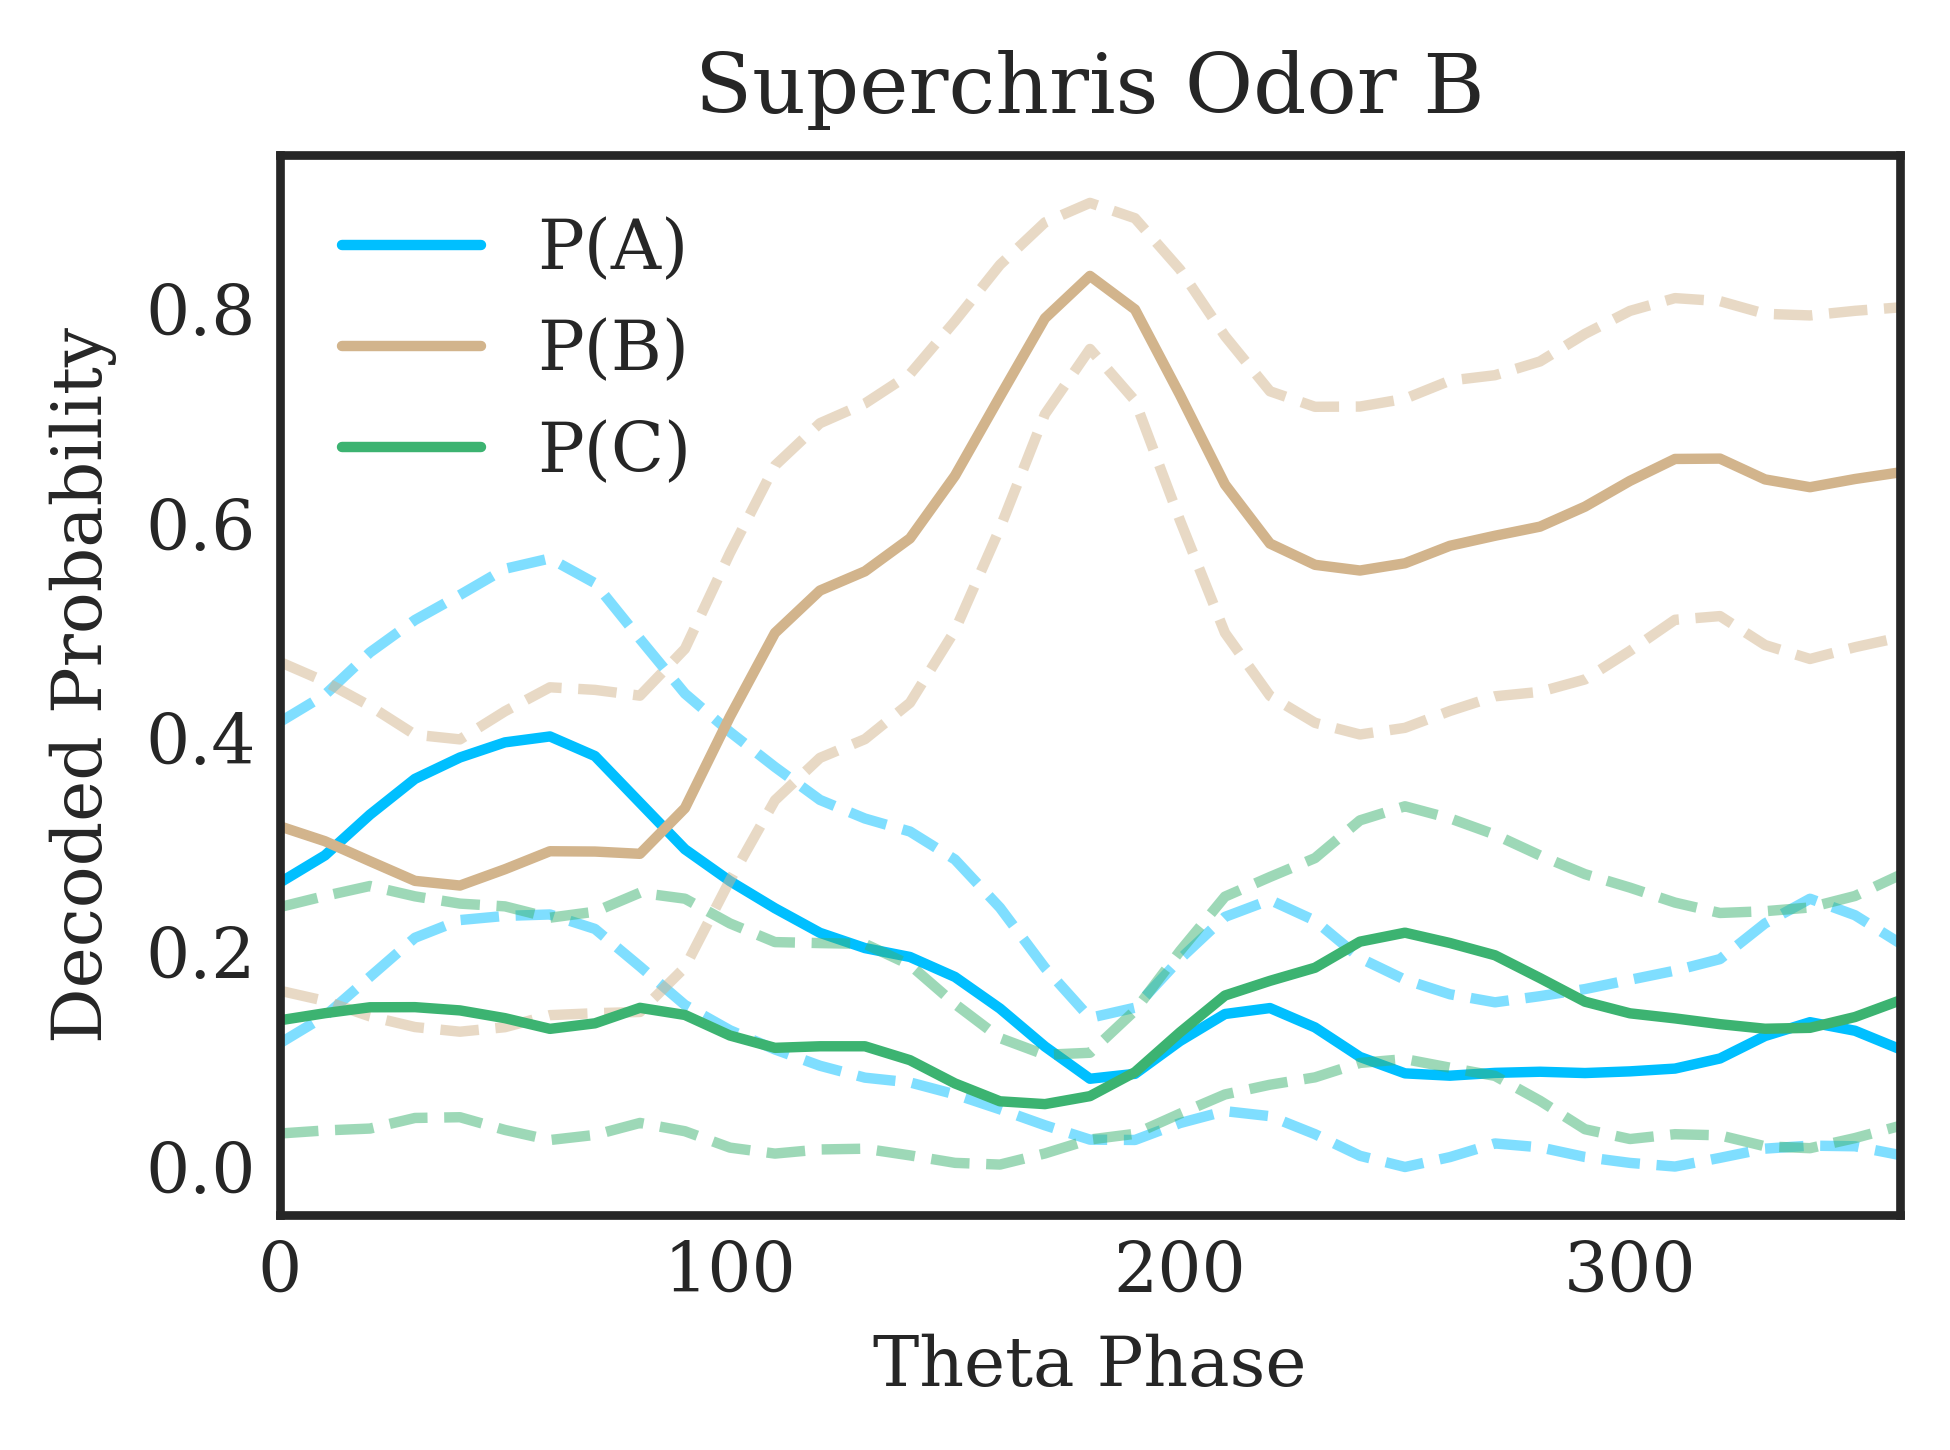

In [6]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_B_decoding(rolling_preds_superchris[target_superchris == 1, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_b_superchris.png', dpi=500)
#plt.savefig('odor_b_superchris.eps', format='eps', dpi=500)
plt.show()

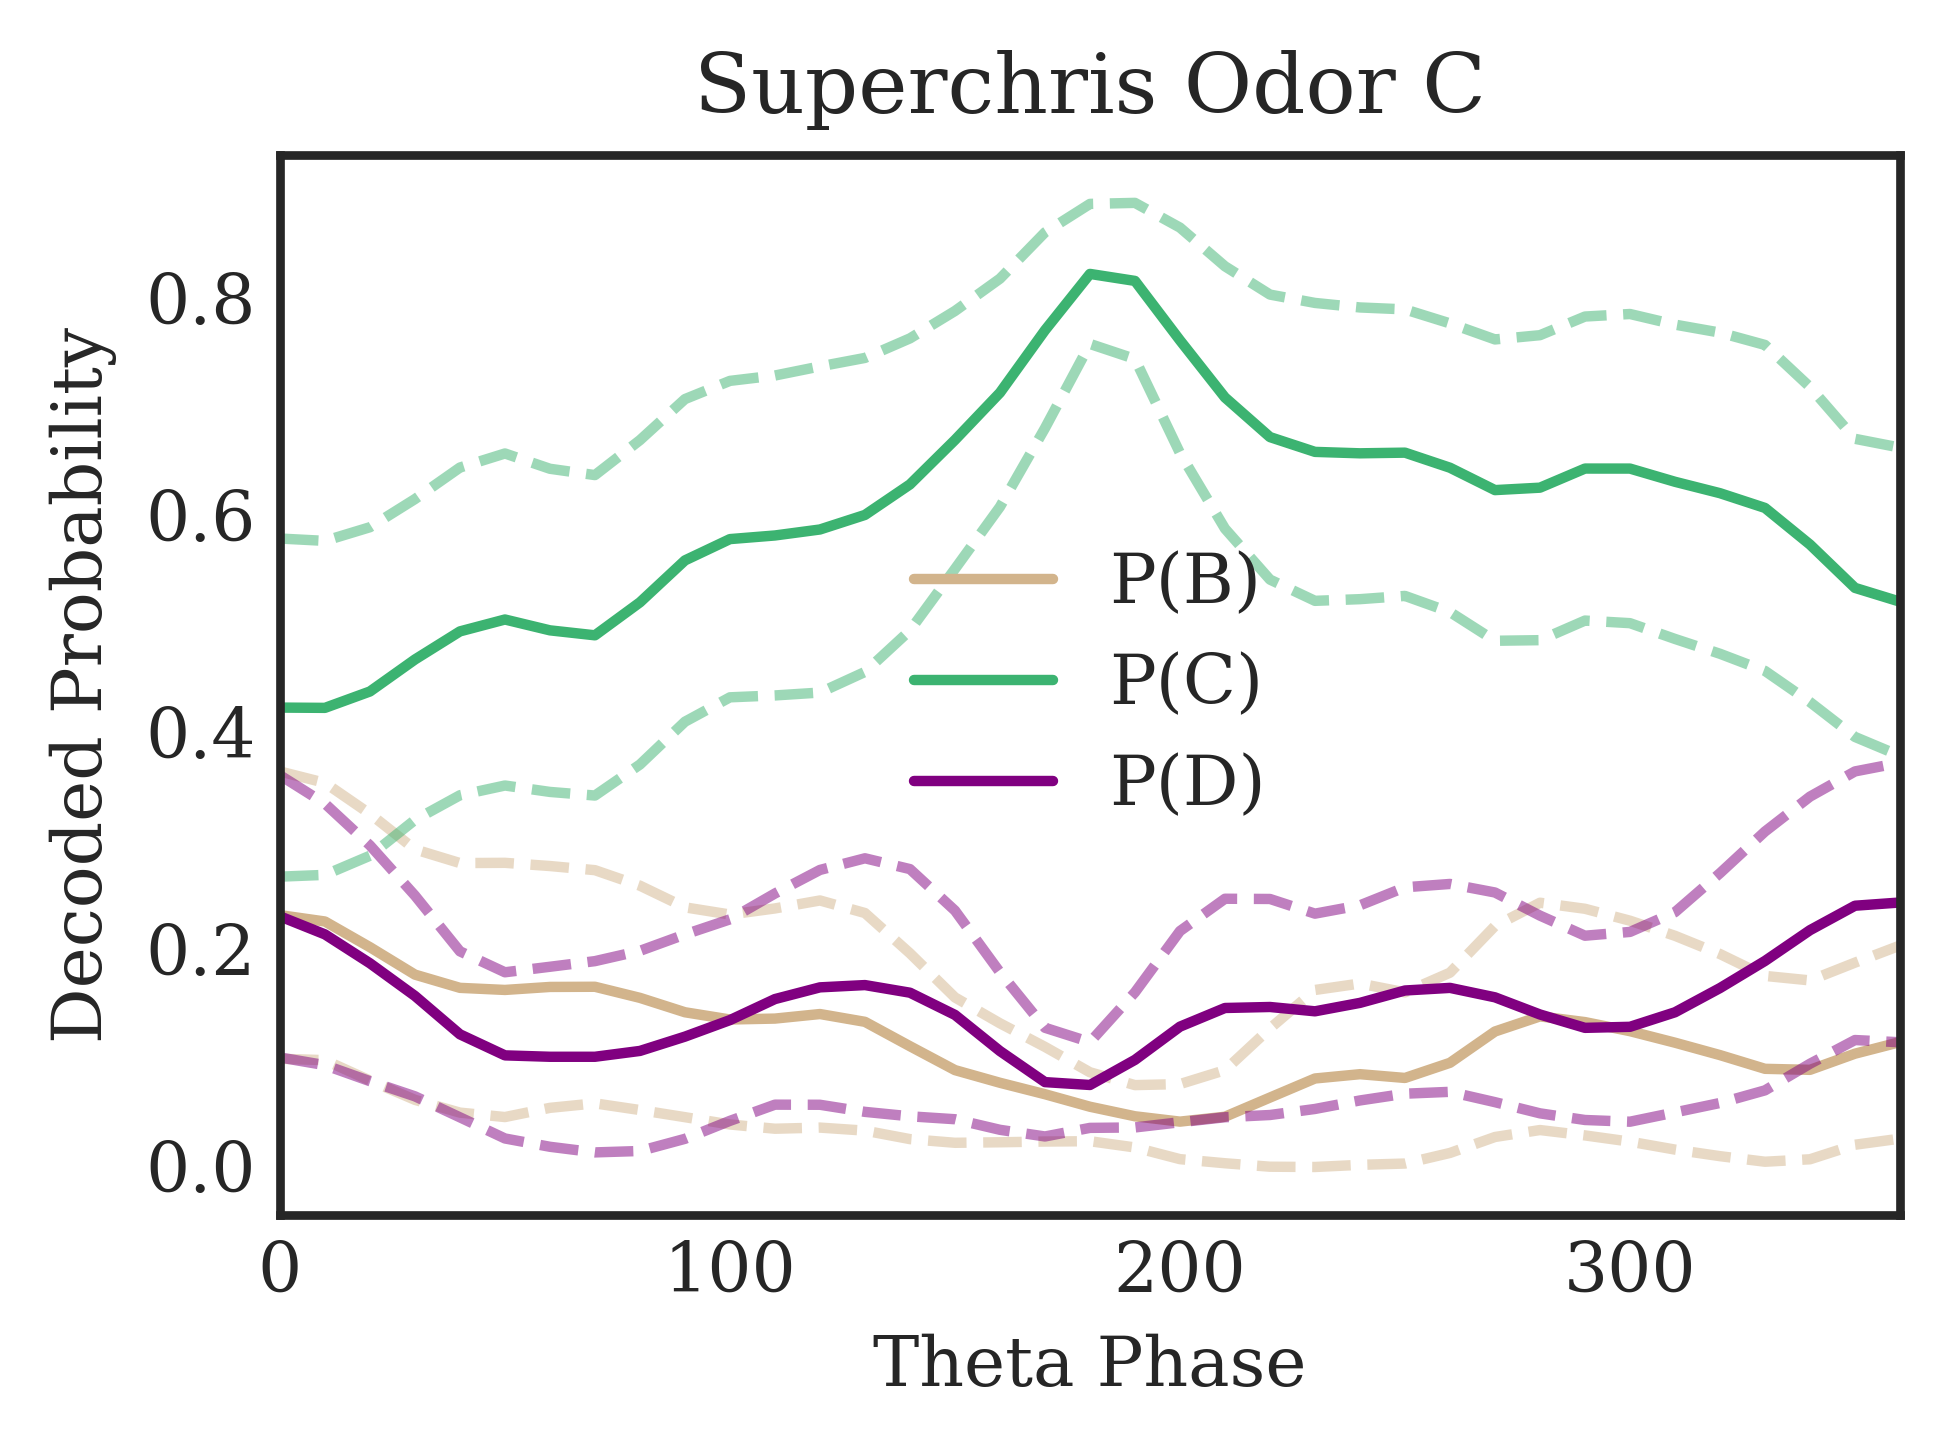

In [7]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_C_decoding(rolling_preds_superchris[target_superchris == 2, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_c_superchris.png', dpi=500)
#plt.savefig('odor_c_superchris.eps', format='eps', dpi=500)
plt.show()

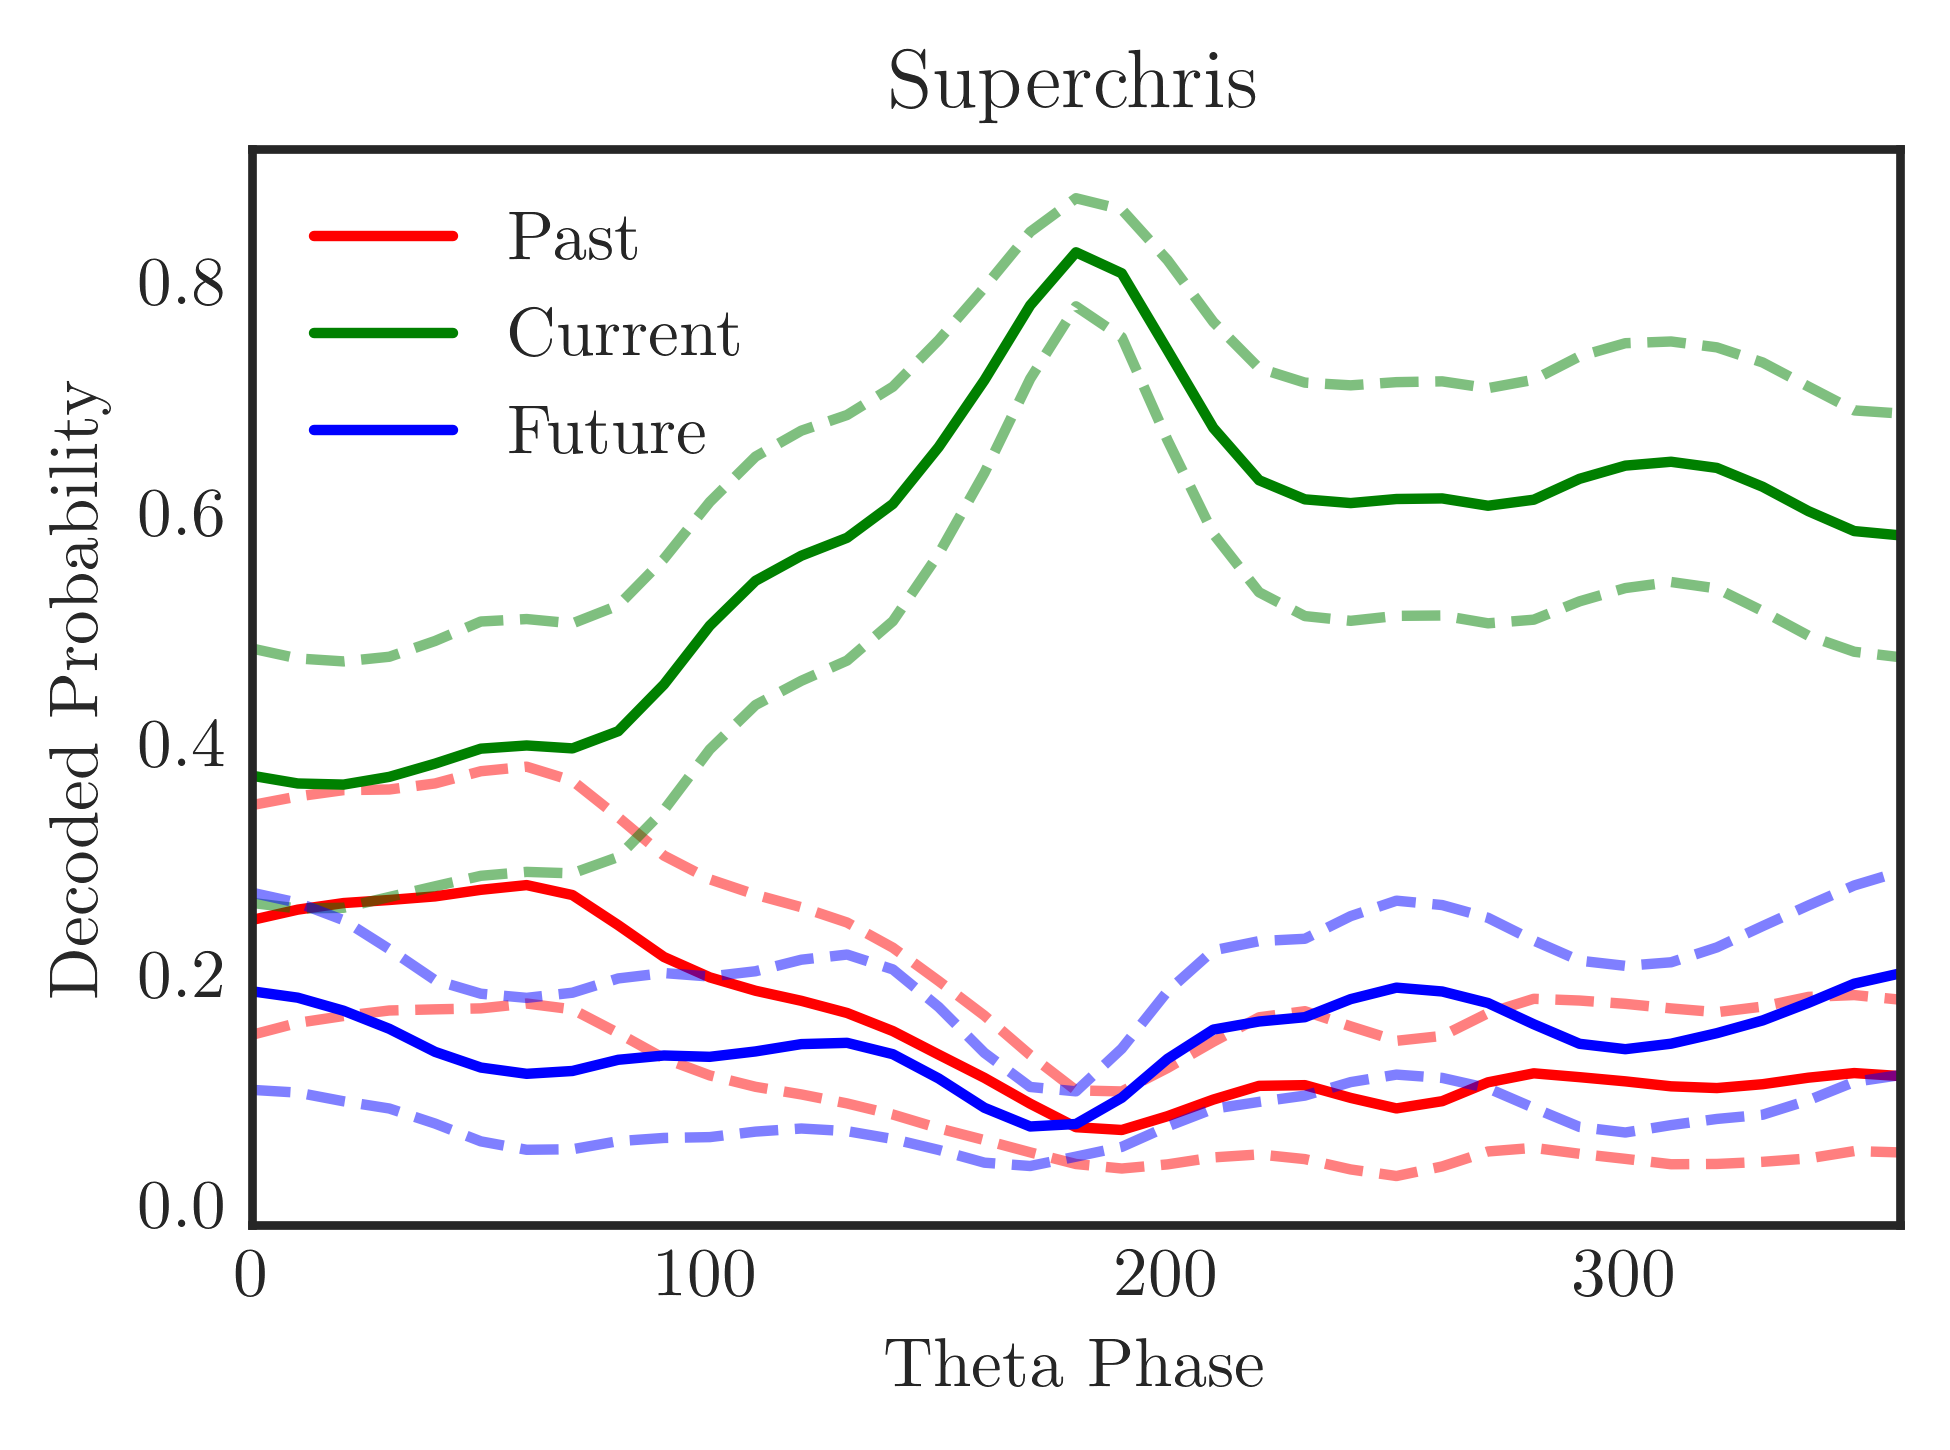

In [17]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
rolling_decoding(rolling_preds_superchris[target_superchris == 1, :, :], rolling_preds_superchris[target_superchris == 2, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('theta_superchris.png', dpi=500)
#plt.savefig('theta_superchris.eps', format='eps', dpi=500)
plt.show()

In [8]:
decoding_preds1_barat, decoding_preds2_barat, decoding_preds3_barat = phase_preds_barat
decoding_preds1_buchanan, decoding_preds2_buchanan, decoding_preds3_buchanan = phase_preds_buchanan
decoding_preds1_stella, decoding_preds2_stella, decoding_preds3_stella = phase_preds_stella
decoding_preds1_superchris, decoding_preds2_superchris, decoding_preds3_superchris = phase_preds_superchris
decoding_preds1_mitt, decoding_preds2_mitt, decoding_preds3_mitt = phase_preds_mitt

In [9]:
from scipy.stats import t

In [10]:
def paired_t_test(first_sample, second_sample):
    diff_sample = first_sample - second_sample
    n = diff_sample.shape[0]
    x_bar = np.mean(diff_sample)
    #print(x_bar)
    s = np.std(diff_sample)
    t_stat = x_bar / (s / np.sqrt(n))
    p = 1 - t.cdf(t_stat, n - 1)
    return p

In [11]:
plt.rc('text', usetex=True)

In [12]:
import matplotlib.patches as mpatches

In [13]:
def hypothesis_test(decoding_preds1_B, decoding_preds2_B, decoding_preds3_B, 
                    decoding_preds1_C, decoding_preds2_C, decoding_preds3_C, name):
    p1 = paired_t_test(np.concatenate([decoding_preds1_B[:, 0], decoding_preds1_C[:, 1]]), np.concatenate([decoding_preds1_B[:, 2], decoding_preds1_C[:, 3]]))
    #print(np.round(p1, 4))
    p3 = paired_t_test(np.concatenate([decoding_preds3_B[:, 2], decoding_preds3_C[:, 3]]), np.concatenate([decoding_preds3_B[:, 0], decoding_preds3_C[:, 1]]))
    #print(np.round(p3, 4))
    violin_parts1 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 0], decoding_preds1_C[:, 1]]), 
                                   np.concatenate([decoding_preds2_B[:, 0], decoding_preds2_C[:, 1]]), 
                                   np.concatenate([decoding_preds3_B[:, 0], decoding_preds3_C[:, 1]])],
                                   [1, 6, 11], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts1['bodies'], facecolor='red', edgecolor='none')
    violin_parts1['cmeans'].set_color('black')

    violin_parts2 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 1], decoding_preds1_C[:, 2]]), 
                                   np.concatenate([decoding_preds2_B[:, 1], decoding_preds2_C[:, 2]]), 
                                   np.concatenate([decoding_preds3_B[:, 1], decoding_preds3_C[:, 2]])],
                                   [2, 7, 12], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts2['bodies'], facecolor='mediumseagreen', edgecolor='none')
    violin_parts2['cmeans'].set_color('black')

    violin_parts2 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 2], decoding_preds1_C[:, 3]]), 
                                   np.concatenate([decoding_preds2_B[:, 2], decoding_preds2_C[:, 3]]), 
                                   np.concatenate([decoding_preds3_B[:, 2], decoding_preds3_C[:, 3]])],
                                   [3, 8, 13], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts2['bodies'], facecolor='blue', edgecolor='none')
    violin_parts2['cmeans'].set_color('black')

    plt.xticks([2, 7, 12], ['Descend', 'Trough', 'Ascend'])
    plt.xlabel('Theta phase')
    plt.ylabel('Decoded Probability')
    plt.title('{} Results'.format(name))
    red_patch = mpatches.Patch(color='red', label='Previous', alpha=0.5)
    green_patch = mpatches.Patch(color='green', label='Current', alpha=0.5)
    blue_patch = mpatches.Patch(color='blue', label='Future', alpha=0.5)
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.text(1, 0.6, r'$p = {}$'.format(np.round(p1, 4)))
    #plt.text(6, 0.6, r'$p = {}$'.format(np.round(p2, 4)))
    plt.text(11, 0.6, r'$p = {}$'.format(np.round(p3, 4)))

In [14]:
decoding_preds1_B = np.concatenate([decoding_preds1_barat[target_barat == 1], 
                                    decoding_preds1_buchanan[target_buchanan == 1], 
                                    decoding_preds1_stella[target_stella == 1], 
                                    decoding_preds1_superchris[target_superchris == 1],
                                    decoding_preds1_mitt[target_mitt == 1]])
decoding_preds2_B = np.concatenate([decoding_preds2_barat[target_barat == 1], 
                                    decoding_preds2_buchanan[target_buchanan == 1], 
                                    decoding_preds2_stella[target_stella == 1], 
                                    decoding_preds2_superchris[target_superchris == 1],
                                    decoding_preds2_mitt[target_mitt == 1]])
decoding_preds3_B = np.concatenate([decoding_preds3_barat[target_barat == 1], 
                                    decoding_preds3_buchanan[target_buchanan == 1], 
                                    decoding_preds3_stella[target_stella == 1], 
                                    decoding_preds3_superchris[target_superchris == 1],
                                    decoding_preds3_mitt[target_mitt == 1]])

In [15]:
decoding_preds1_C = np.concatenate([decoding_preds1_barat[target_barat == 2], 
                                    decoding_preds1_buchanan[target_buchanan == 2], 
                                    decoding_preds1_stella[target_stella == 2], 
                                    decoding_preds1_superchris[target_superchris == 2],
                                    decoding_preds1_mitt[target_mitt == 2]])
decoding_preds2_C = np.concatenate([decoding_preds2_barat[target_barat == 2], 
                                    decoding_preds2_buchanan[target_buchanan == 2], 
                                    decoding_preds2_stella[target_stella == 2], 
                                    decoding_preds2_superchris[target_superchris == 2],
                                    decoding_preds2_mitt[target_mitt == 2]])
decoding_preds3_C = np.concatenate([decoding_preds3_barat[target_barat == 2], 
                                    decoding_preds3_buchanan[target_buchanan == 2], 
                                    decoding_preds3_stella[target_stella == 2], 
                                    decoding_preds3_superchris[target_superchris == 2],
                                    decoding_preds3_mitt[target_mitt == 2]])

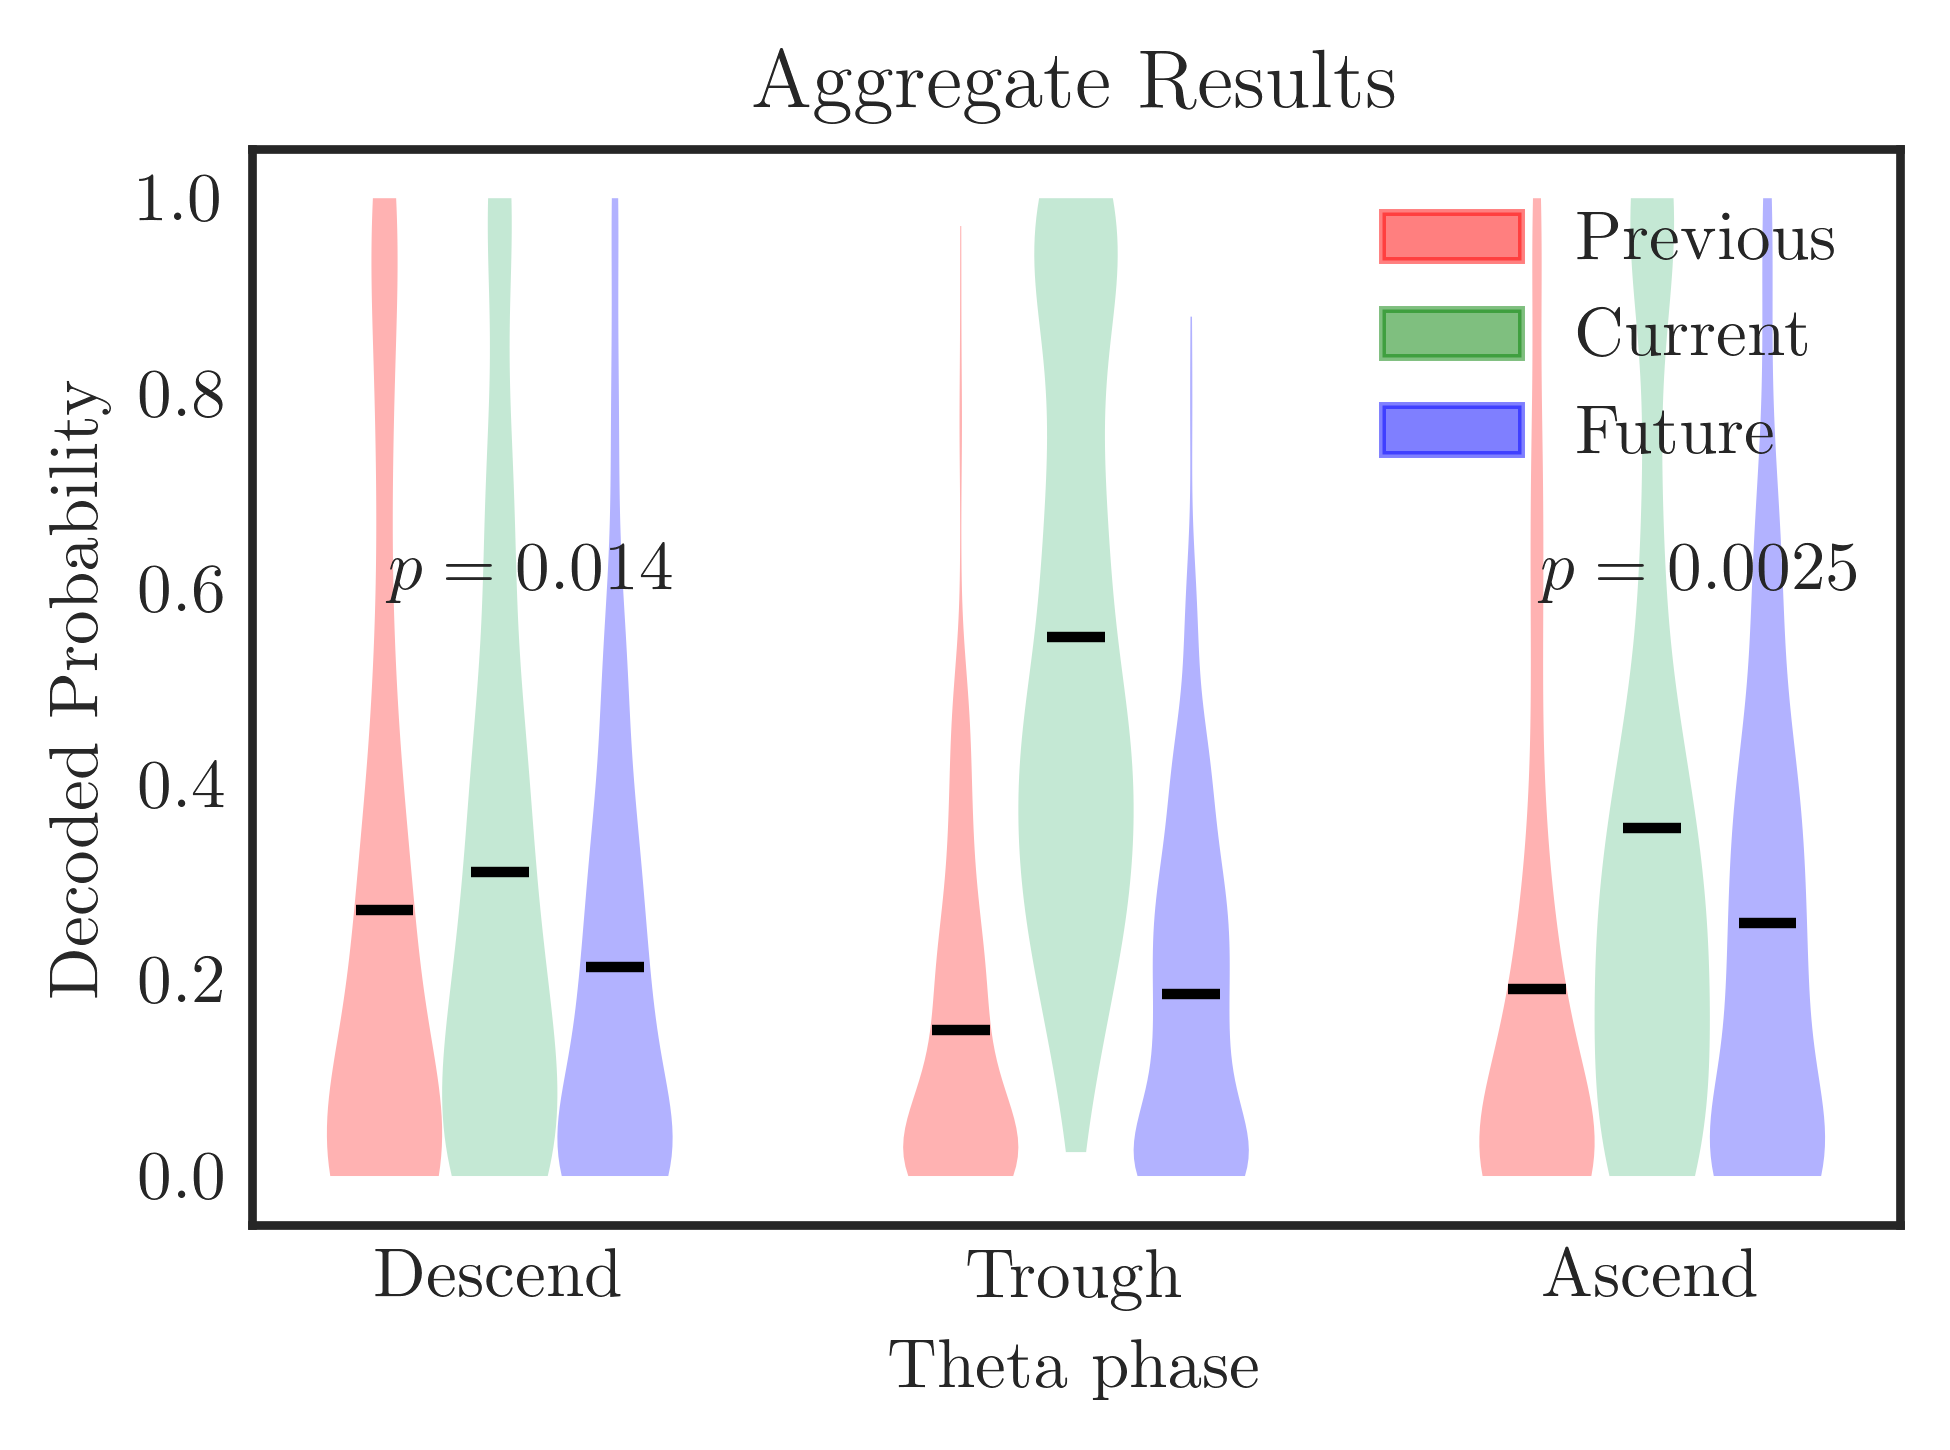

In [16]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
hypothesis_test(decoding_preds1_B, decoding_preds2_B, decoding_preds3_B, 
                    decoding_preds1_C, decoding_preds2_C, decoding_preds3_C, 'Aggregate')
fig.tight_layout()
#plt.savefig('hypothesis_test.png', dpi=500)
#plt.savefig('hypothesis_test.eps', format='eps', dpi=500)
plt.show()

In [11]:
odor_B_preds = np.concatenate([rolling_preds_barat[target_barat == 1, :, :], 
                               rolling_preds_buchanan[target_buchanan == 1, :, :],
                               rolling_preds_stella[target_stella == 1, :, :],
                               rolling_preds_superchris[target_superchris == 1, :, :], 
                               rolling_preds_mitt[target_mitt == 1, :, :]])

In [12]:
odor_C_preds = np.concatenate([rolling_preds_barat[target_barat == 2, :, :], 
                               rolling_preds_buchanan[target_buchanan == 2, :, :],
                               rolling_preds_stella[target_stella == 2, :, :],
                               rolling_preds_superchris[target_superchris == 2, :, :], 
                               rolling_preds_mitt[target_mitt == 2, :, :]])

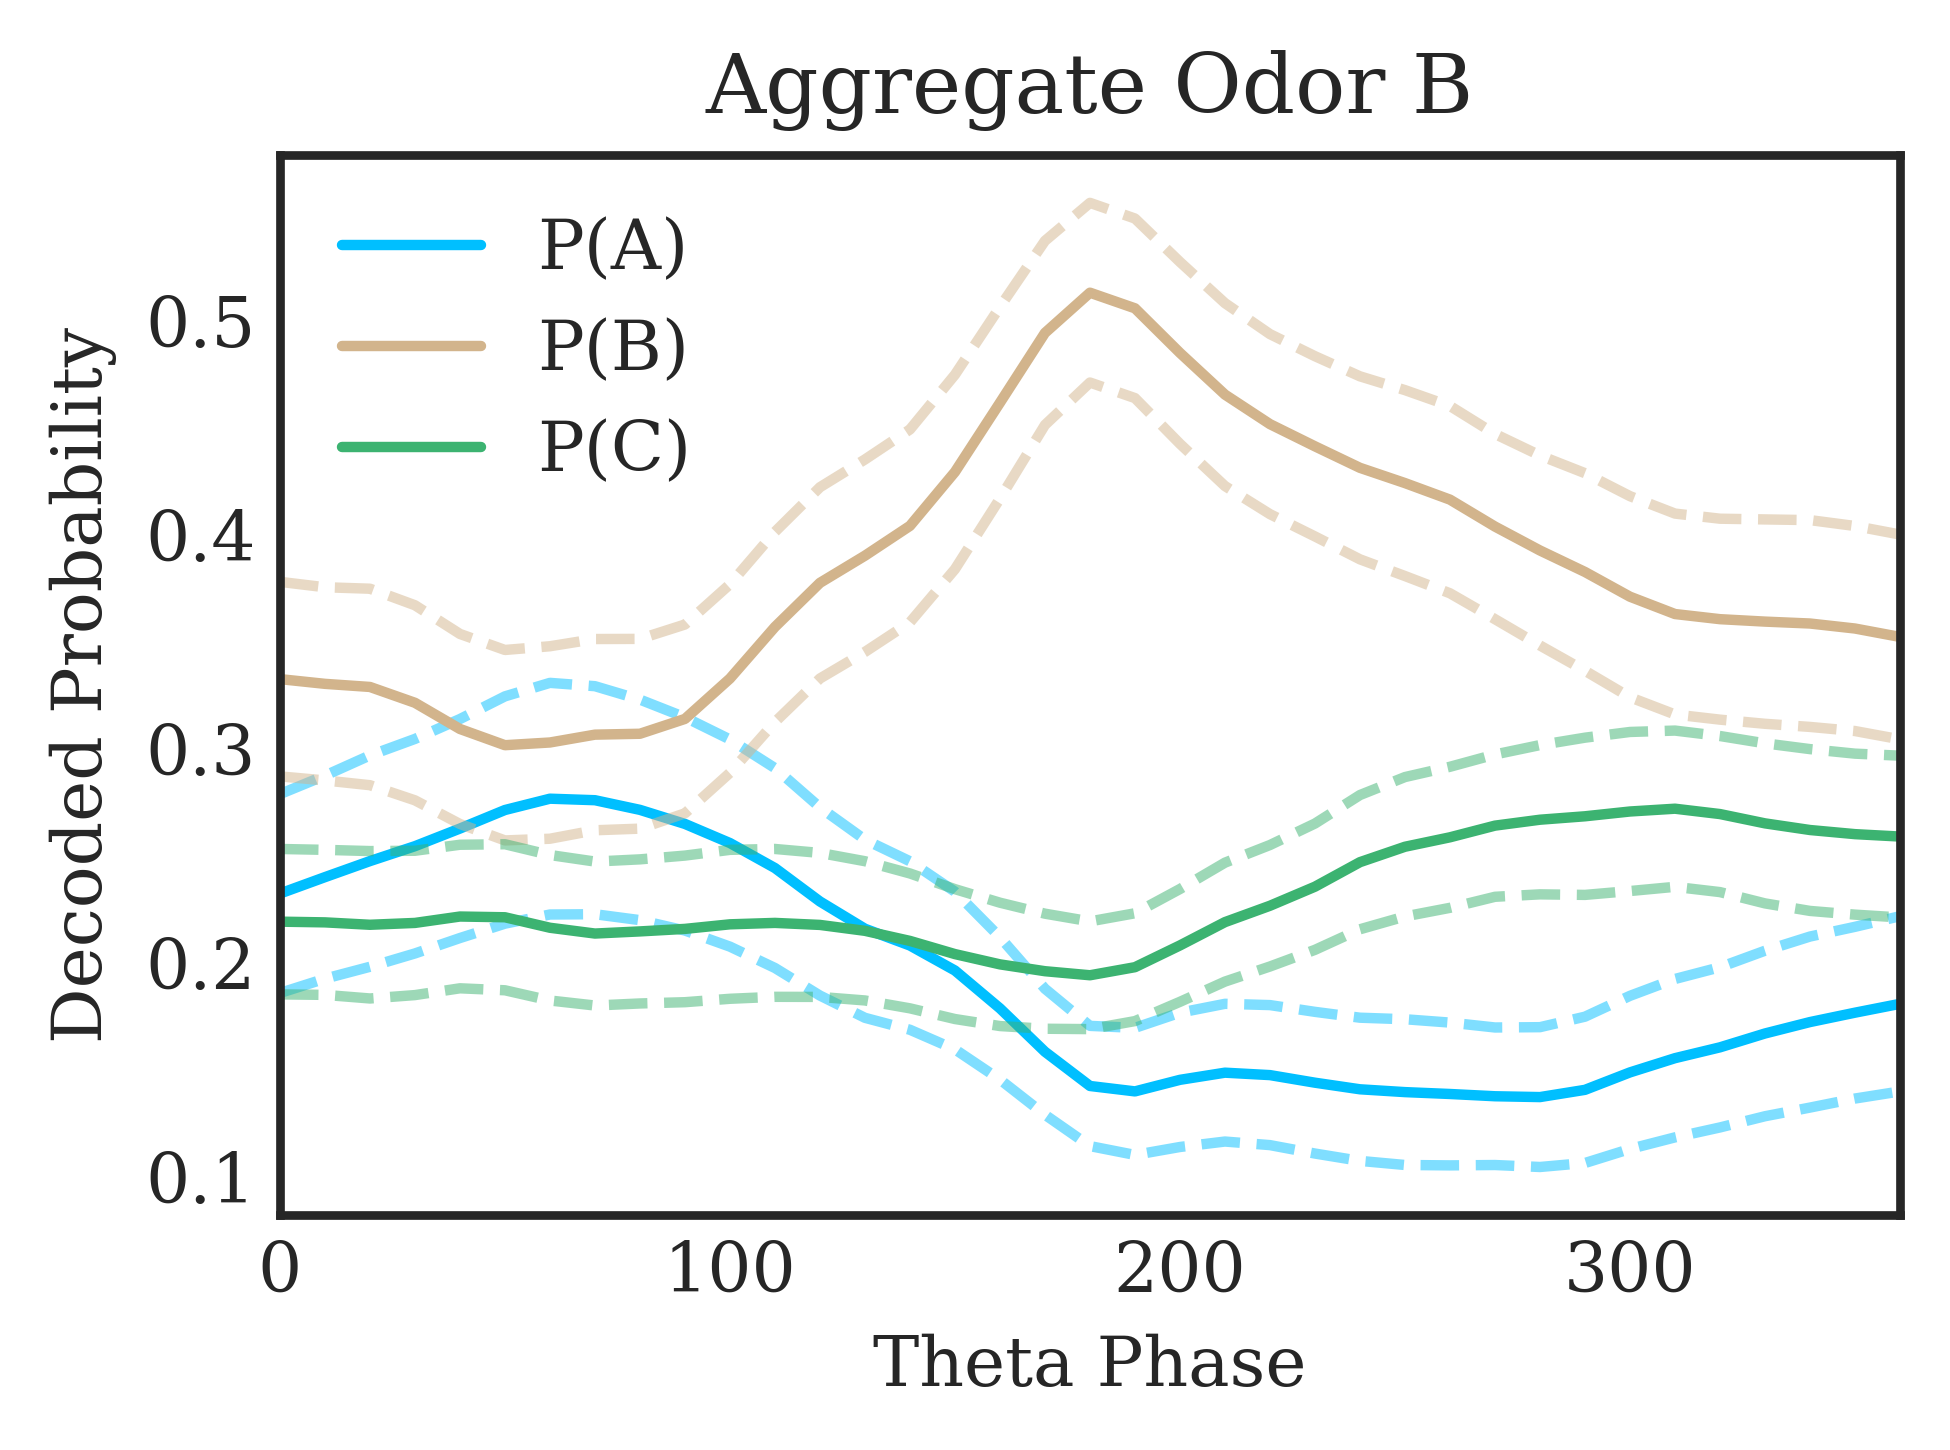

In [13]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_B_decoding(odor_B_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('odor_b_aggregate.png', dpi=500)
plt.savefig('odor_b_aggregate.eps', format='eps', dpi=500)
plt.show()

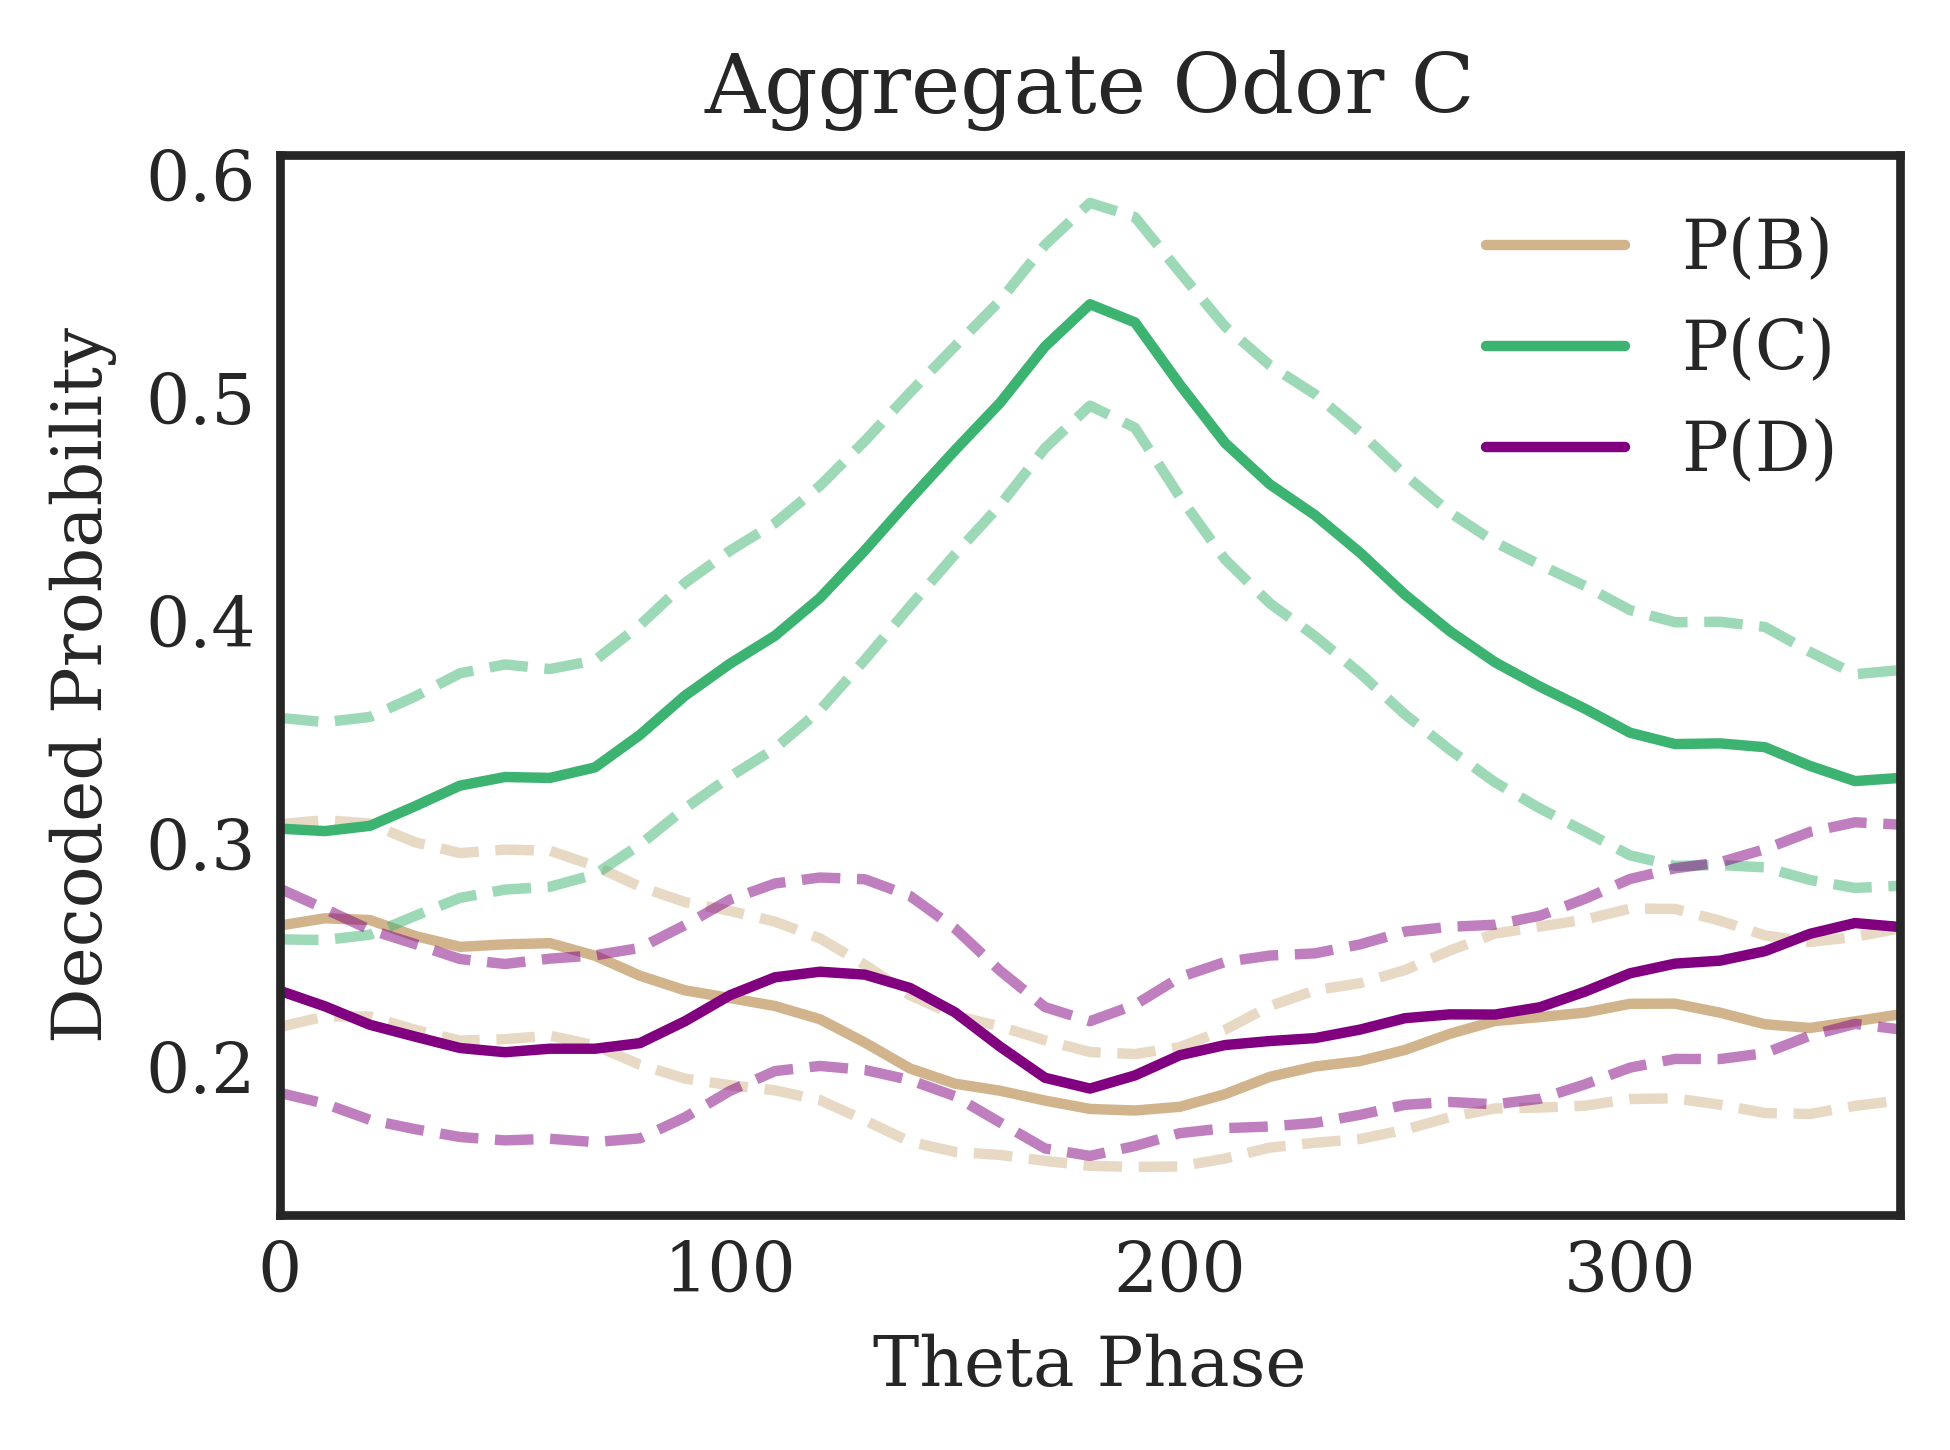

In [14]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_C_decoding(odor_C_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('odor_c_aggregate.png', dpi=500)
plt.savefig('odor_c_aggregate.eps', format='eps', dpi=500)
plt.show()

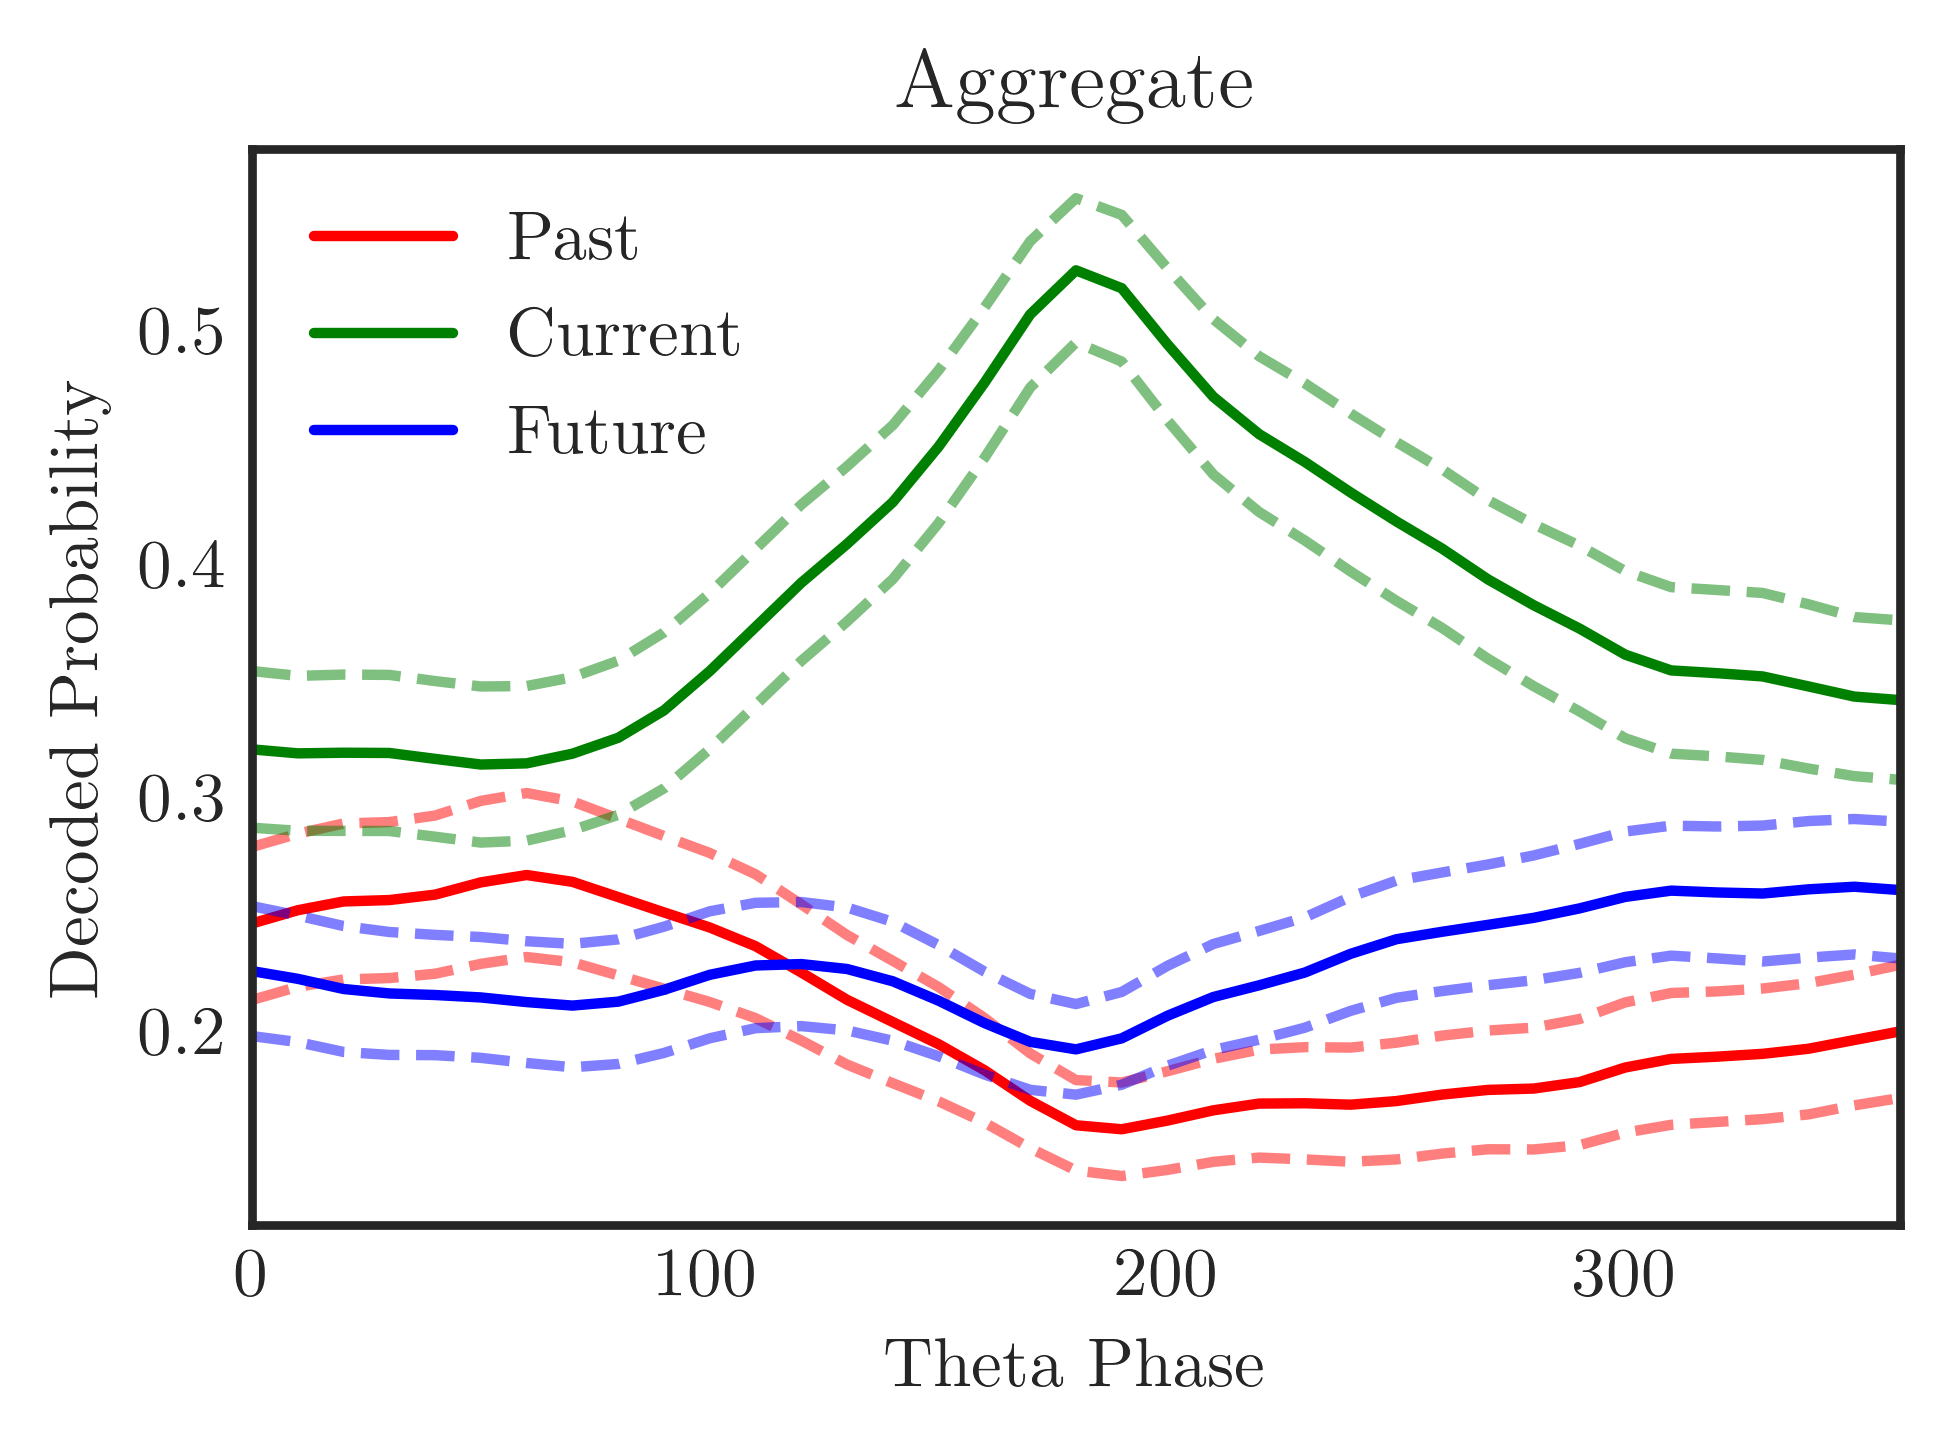

In [33]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
rolling_decoding(odor_B_preds, odor_C_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('theta_aggregate.png', dpi=500)
plt.savefig('theta_aggergate.eps', format='eps', dpi=500)
plt.show()